# Project In ML and AI - HW1

### Task 1 (10 points): Describe a machine-learning problem that you would like to solve using Logistic Regression. Clearly state why Logistic regression is the best choice for solving this problem.

### Task 2 (20 points): Pick a publicly available dataset (except The Titanic Dataset) that you will use to solve this problem. You must provide a link to the dataset and perform the necessary Exploratory Data Analysis (EDA). Clearly demonstrate the steps you follow for your EDA with justification of why these were required. For example, if the dataset has lot of missing value then why did you use a specific technique when handling missing data. This task may include data visualization (Check this link : https://www.geeksforgeeks.org/top-8-python-libraries-fordata-visualization/ ).

Data Overview:
   Variance of Wavelet Transformed Image  \
0                                3.62160   
1                                4.54590   
2                                3.86600   
3                                3.45660   
4                                0.32924   

   Skewness of Wavelet Transformed Image  \
0                                 8.6661   
1                                 8.1674   
2                                -2.6383   
3                                 9.5228   
4                                -4.4552   

   Curtosis of Wavelet Transformed Image  Entropy of Image  Target  
0                                -2.8073          -0.44699       0  
1                                -2.4586          -1.46210       0  
2                                 1.9242           0.10645       0  
3                                -4.0112          -3.59440       0  
4                                 4.5718          -0.98880       0  

Data Description:
       Variance of Wav

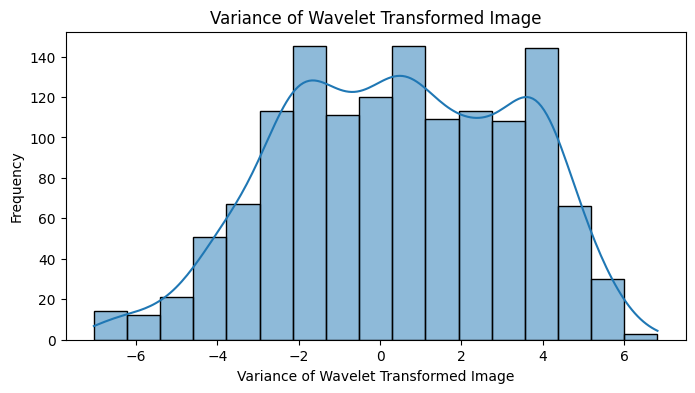

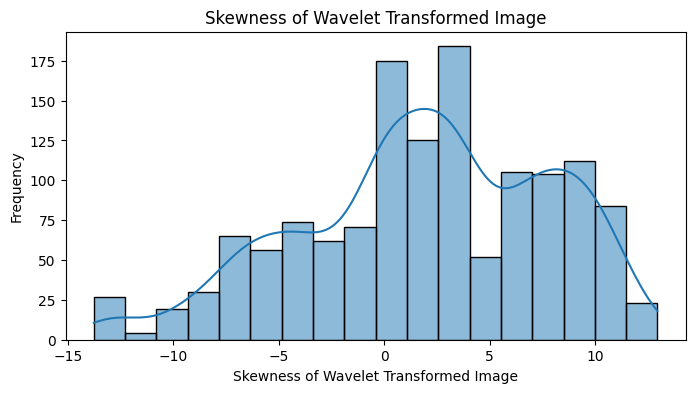

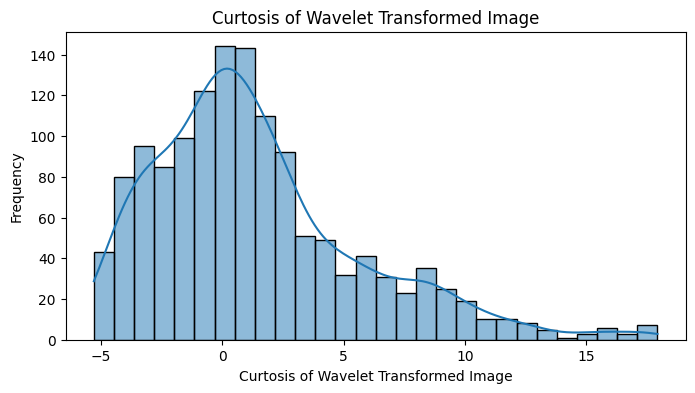

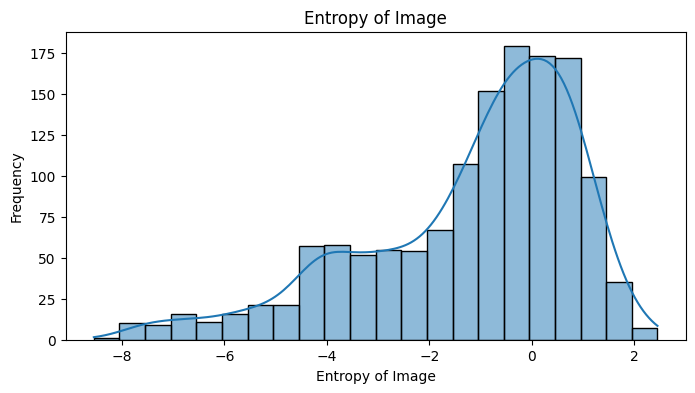

C:\Users\songh5\miniconda3\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\songh5\miniconda3\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\songh5\miniconda3\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\songh5\miniconda3\Lib\site-packages\seaborn\_base.py:949: 

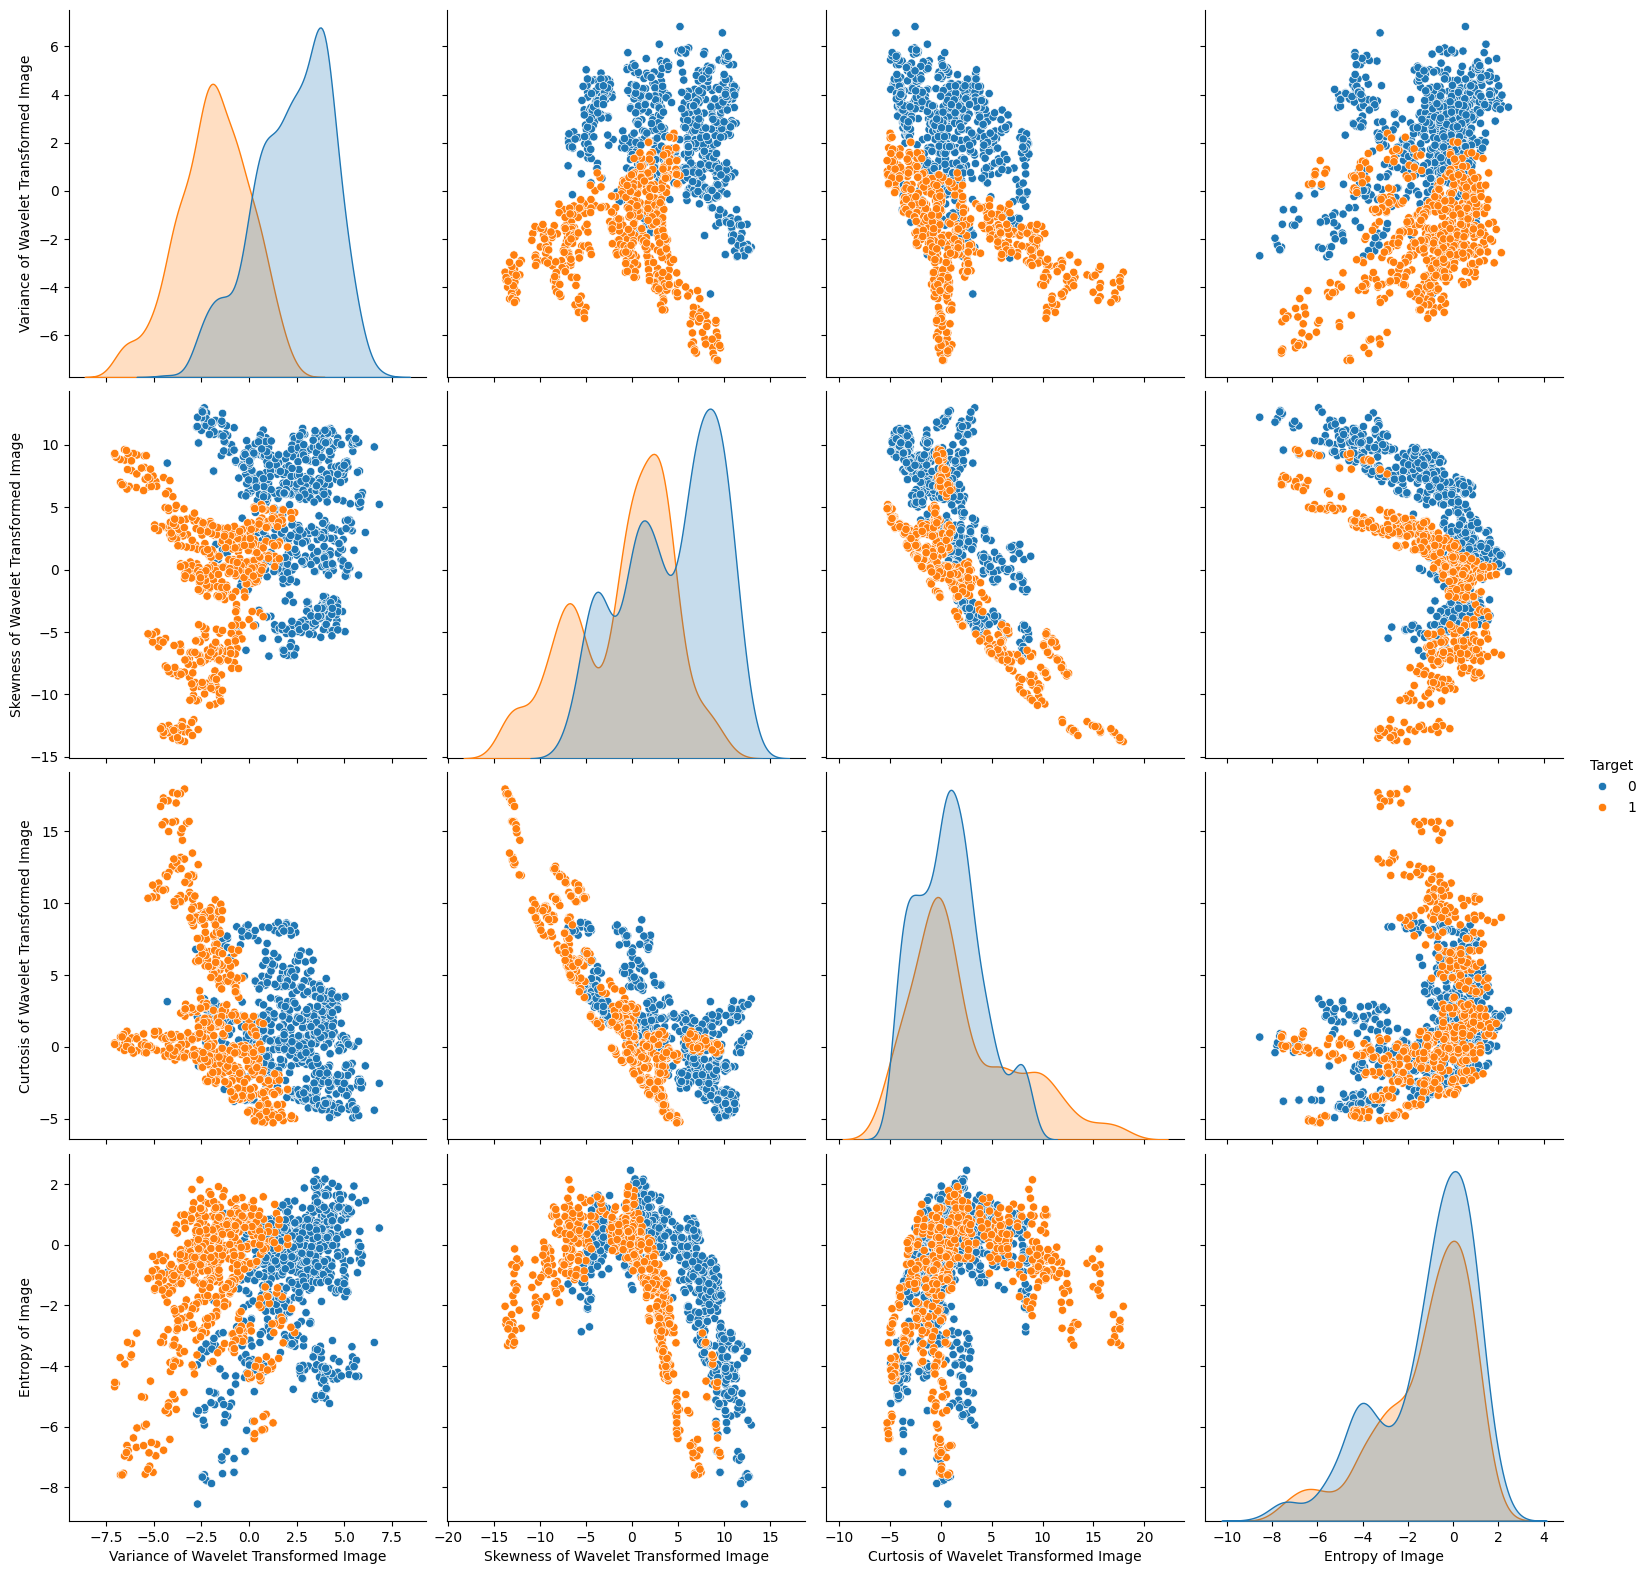

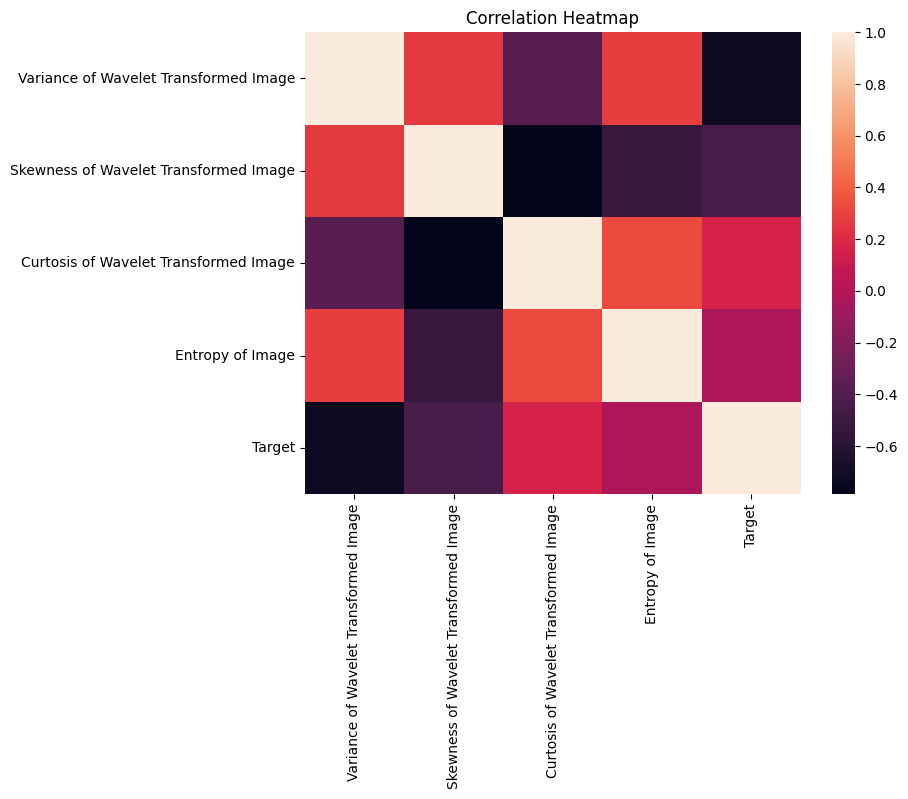

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('data_banknote_authentication.txt', header=None)


data.columns = ['Variance of Wavelet Transformed Image', 'Skewness of Wavelet Transformed Image',
                   'Curtosis of Wavelet Transformed Image', 'Entropy of Image', 'Target']


# （1) Summary of Data
#
# data.describe(): Provides statistical summaries of numerical features, such as mean, standard deviation, minimum/maximum values, etc. 
# This helps to understand the distribution of the data, such as whether any features are extremely skewed or outliers.
#
# data.info(): Provides the data type and the number of non-null values for each column. 
# This helps identify possible problems in the data, such as wrong data types or missing values.

print("Data Overview:")
print(data.head())
print("\nData Description:")
print(data.describe())

# (2) Missing Values:
#
# (website says) Has Missing Values? No
# Why need to check: Missing values can affect the accuracy and reliability of the model.



# (3) Univariate Analysis
#
# Why need: Show the distribution and potential outliers for each numerical feature.
for feature in data.columns[:-1]:  
    plt.figure(figsize=(8, 4))
    sns.histplot(data[feature], kde=True)
    plt.title(f'{feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


# (4) Bivariate Analysis 
# why need: explore the relationship between numerical features
sns.pairplot(data, hue='Target', height=4)
plt.show()

# (5) heatmap
# why need: Visualize the correlation matrix to visually show the correlation between features and target.
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr())
plt.title('Correlation Heatmap')
plt.show()

### Task 3 (25 points): Implement, Logistic Regression in this step. Clearly write your cost function and derivatives before implementing gradient descent. Do not use any built-in packages for this step. You can use the vectorization techniques demonstrated in class. Implement any 2 variant of gradient descent in their original form. (Refer to the research paper discussed in class).



In [10]:
import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000, variant='batch'):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        self.variant = variant

    def sigmoid(self, z):
        z = np.array(z, dtype=float) 
        return 1 / (1 + np.exp(-z))

    
    def compute_cost(self, X, y):
        m = len(y)
        model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(model)
        cost = - (1 / m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        return cost

    def fit(self, X, y):
        

        if isinstance(X, pd.DataFrame):
            X = X.to_numpy().astype(float)
            
        if isinstance(y, pd.DataFrame) or isinstance(y, pd.Series):
            y = y.astype(float).to_numpy().flatten()
            
        #print("X shape:", X.shape)
        #print("y shape:", y.shape)
        m, n = X.shape
        self.weights = np.zeros(n)
        #print("weight shape: ", self.weights.shape)
        self.bias = 0
        costs = []

        if self.variant == 'batch':
            for _ in range(self.num_iterations):
                model = np.dot(X, self.weights) + self.bias
                y_pred = self.sigmoid(model)
                y_pred_series = pd.Series(y_pred.flatten())

                dw = (1 / m) * np.dot(X.T, (y_pred_series - y))
                db = (1 / m) * np.sum(y_pred_series - y)

                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db
                
                cost = self.compute_cost(X, y)
                costs.append(cost)

        elif self.variant == 'stochastic':
            for _ in range(self.num_iterations):
                for i in range(m):
                    xi = X[i, :].reshape(1, -1)
                    yi = y[i]

                    model = np.dot(xi, self.weights) + self.bias
                    y_pred = self.sigmoid(model)

                    dw = xi.T.dot(y_pred - yi)
                    db = (y_pred - yi)

                    self.weights -= self.learning_rate * dw.flatten()
                    self.bias -= self.learning_rate * db
                    
                    cost = self.compute_cost(X, y)
                    costs.append(cost)
                    
        return costs 

    def predict(self, X):
        model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(model)
        y_pred_class = [1 if i > 0.5 else 0 for i in y_pred]
        return y_pred_class

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler



# load 
data = pd.read_csv('data_banknote_authentication.txt', header=None)
data.columns = ['Variance of Wavelet Transformed Image', 'Skewness of Wavelet Transformed Image',
                   'Curtosis of Wavelet Transformed Image', 'Entropy of Image', 'Target']


X = data.drop('Target', axis=1)
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Batch Gradient Descent
model_batch = LogisticRegression(learning_rate=0.01, num_iterations=1000, variant='batch')
model_batch.fit(X_train_scaled, y_train)

predictions_batch = model_batch.predict(X_test_scaled)
accuracy_batch = accuracy_score(y_test, predictions_batch)
print("Accuracy with Batch Gradient Descent:", accuracy_batch)


# Stochastic Gradient Descent
model_stochastic = LogisticRegression(learning_rate=0.01, num_iterations=1000, variant='stochastic')
model_stochastic.fit(X_train_scaled, y_train)


predictions_stochastic = model_stochastic.predict(X_test_scaled)
accuracy_stochastic = accuracy_score(y_test, predictions_stochastic)
print("\nAccuracy with Stochastic Gradient Descent:", accuracy_stochastic)

Accuracy with Batch Gradient Descent: 0.9018181818181819

Accuracy with Stochastic Gradient Descent: 0.9854545454545455


### Task 4 (45 points): Pick any 2 optimization algorithms that are used to optimize the ‘vanilla’ gradient descent. Implement both. You may implement these algorithms yourself OR use a package. In your conclusion, compare both optimization techniques/algorithms with respect to the results you achieve. Also compare these results with the original implementation of gradient descent (Task 3 above). Describe why we should or why we should not use optimization algorithms for the task at hand. For comparison of these algorithms define an evaluation metric appropriate for your problem. (For more on evaluation metrics check this link: https://www.kdnuggets.com/2020/05/model-evaluation-metrics-machine-learning.html )

In [12]:
import numpy as np


class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000, variant='batch'):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        self.variant = variant

    def sigmoid(self, z):
        z = np.array(z, dtype=float) 
        return 1 / (1 + np.exp(-z))

    
    def compute_cost(self, X, y):
        m = len(y)
        model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(model)
        cost = - (1 / m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        return cost

    def fit(self, X, y):
        

        if isinstance(X, pd.DataFrame):
            X = X.to_numpy().astype(float)
            
        if isinstance(y, pd.DataFrame) or isinstance(y, pd.Series):
            y = y.astype(float).to_numpy().flatten()
            
        #print("X shape:", X.shape)
        #print("y shape:", y.shape)
        m, n = X.shape
        self.weights = np.zeros(n)
        #print("weight shape: ", self.weights.shape)
        self.bias = 0
        costs = []
        

        if self.variant == 'batch':
            for _ in range(self.num_iterations):
                model = np.dot(X, self.weights) + self.bias
                y_pred = self.sigmoid(model)
                y_pred_series = pd.Series(y_pred.flatten())

                dw = (1 / m) * np.dot(X.T, (y_pred_series - y))
                db = (1 / m) * np.sum(y_pred_series - y)

                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db
                
                cost = self.compute_cost(X, y)
                costs.append(cost)

        elif self.variant == 'stochastic':
            for _ in range(self.num_iterations):
                for i in range(m):
                    xi = X[i, :].reshape(1, -1)
                    yi = y[i]

                    model = np.dot(xi, self.weights) + self.bias
                    y_pred = self.sigmoid(model)

                    dw = xi.T.dot(y_pred - yi)
                    db = (y_pred - yi)

                    self.weights -= self.learning_rate * dw.flatten()
                    self.bias -= self.learning_rate * db
                    
                    cost = self.compute_cost(X, y)
                    costs.append(cost)
                    
        elif self.variant == 'adam':  
  
            b1, b2 = 0.9, 0.999
            eps = 1e-8
            m_w, v_w = np.zeros(n), np.zeros(n)
            m_b, v_b = 0, 0
            
            for i in range(self.num_iterations):
                model = np.dot(X, self.weights) + self.bias
                y_pred = self.sigmoid(model)
    
                dw = (1 / m) * np.dot(X.T, (y_pred - y))
                db = (1 / m) * np.sum(y_pred - y)
    
                m_w = b1 * m_w + (1 - b1) * dw
                v_w = b2 * v_w + (1 - b2) * (dw ** 2)
                m_b = b1 * m_b + (1 - b1) * db
                v_b = b2 * v_b + (1 - b2) * (db ** 2)
    
                m_w_corr = m_w / (1 - b1 ** (i + 1))
                v_w_corr = v_w / (1 - b2 ** (i + 1))
                m_b_corr = m_b / (1 - b1 ** (i + 1))
                v_b_corr = v_b / (1 - b2 ** (i + 1))
    
                self.weights -= self.learning_rate * m_w_corr / (np.sqrt(v_w_corr) + eps)
                self.bias -= self.learning_rate * m_b_corr / (np.sqrt(v_b_corr) + eps)
                
        elif self.variant == 'rmsprop':
            b1, b2 = 0.9, 0.999
            eps = 1e-8
            v_w = np.zeros(n)
            v_b = 0
            
            for i in range(self.num_iterations):
                model = np.dot(X, self.weights) + self.bias
                y_pred = self.sigmoid(model)
    
                dw = (1 / m) * np.dot(X.T, (y_pred - y))
                db = (1 / m) * np.sum(y_pred - y)
                
                v_w = b2 * v_w + (1 - b2) * (dw ** 2)
                v_b = b2 * v_b + (1 - b2) * (db ** 2)
                
                self.weights -= self.learning_rate * dw / (np.sqrt(v_w) + eps)
                self.bias -= self.learning_rate * db / (np.sqrt(v_b) + eps)
            
                    
        return costs 

    def predict(self, X):
        model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(model)
        y_pred_class = [1 if i > 0.5 else 0 for i in y_pred]
        return y_pred_class

In [13]:
# Data preparation
data = pd.read_csv('data_banknote_authentication.txt', header=None)
data.columns = ['Variance of Wavelet Transformed Image', 'Skewness of Wavelet Transformed Image',
                   'Curtosis of Wavelet Transformed Image', 'Entropy of Image', 'Target']

X = data.drop('Target', axis=1)
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# adam
model_adam = LogisticRegression(learning_rate=0.01, num_iterations=1000, variant='adam')
model_adam.fit(X_train_scaled, y_train)
predictions_adam = model_adam.predict(X_test_scaled)
accuracy_adam = accuracy_score(y_test, predictions_adam)
print("Accuracy with Adam optimizer:", accuracy_adam)

# RMSprop
model_rmsprop = LogisticRegression(learning_rate=0.01, num_iterations=1000, variant='rmsprop')
model_rmsprop.fit(X_train_scaled, y_train)
predictions_rmsprop = model_rmsprop.predict(X_test_scaled)
accuracy_rmsprop = accuracy_score(y_test, predictions_rmsprop)
print("Accuracy with RMSprop optimizer:", accuracy_rmsprop)

Accuracy with Adam optimizer: 0.9781818181818182
Accuracy with RMSprop optimizer: 0.9818181818181818
